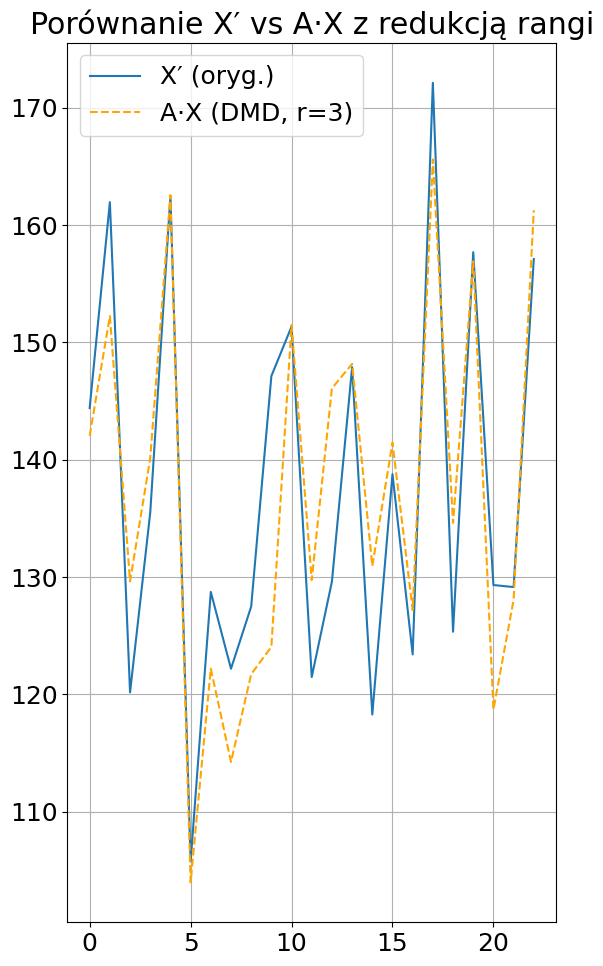

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import svd

X_df = pd.read_csv("War3_X.csv", sep=";", decimal=",", header=None)
X_prime_df = pd.read_csv("War3_Xprime.csv", sep=";", decimal=",", header=None)

X = X_df.to_numpy(dtype=float).T
X_prime = X_prime_df.to_numpy(dtype=float).T

r = 3  

U, Sigma, VT = svd(X, full_matrices=False)
U_r = U[:, :r]
Sigma_r = np.diag(Sigma[:r])
VT_r = VT[:r, :]

A_tilde = X_prime @ VT_r.T @ np.linalg.inv(Sigma_r) @ U_r.T

X_prime_approx = A_tilde @ X

plt.figure(figsize=(6, 10))
plt.plot(X_prime[0, :], label="X′ (oryg.)")
plt.plot(X_prime_approx[0, :], "--", label="A·X (DMD, r=3)", color='orange')
plt.legend()
plt.title("Porównanie X′ vs A·X z redukcją rangi")
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
print("Macierz A (DMD):\n", A_tilde)

Macierz A (DMD):
 [[ -0.      -0.       0.     ...   0.      -0.      -0.    ]
 [ -0.      -0.       0.     ...   0.      -0.      -0.    ]
 [ -0.      -0.       0.     ...   0.      -0.      -0.    ]
 ...
 [  0.       0.       0.     ...  -0.       1.      -0.    ]
 [  0.       0.      -0.     ...  -0.      -0.       1.    ]
 [ -0.      -0.       0.     ... 230.0131  28.7448   7.1522]]
